# Pizza Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pizza1=pd.read_csv('pizza_v1.csv')
pizza2=pd.read_csv('pizza_v2.csv')

In [3]:
pizza1.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [4]:
pizza1.shape

(129, 8)

In [5]:
pizza2.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [6]:
pizza2.shape

(129, 9)

In [7]:
pizza1['extra_mushrooms']=pizza2['extra_mushrooms']

In [8]:
pizza1.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [9]:
df=pizza1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price_rupiah     129 non-null    object 
 2   diameter         129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(1), object(8)
memory usage: 9.2+ KB


In [10]:
df['price']=df['price_rupiah'].str.replace('Rp','').str.replace(',','').astype(int)

In [11]:
df.drop(['price_rupiah'],axis=1,inplace=True)

In [12]:
df.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,22.0,chicken,double_signature,jumbo,yes,yes,no,235000
1,A,20.0,papperoni,double_signature,jumbo,yes,yes,no,198000
2,A,16.0,mushrooms,double_signature,reguler,yes,yes,yes,120000
3,A,14.0,smoked beef,double_signature,reguler,yes,no,yes,155000
4,A,18.0,mozzarella,double_signature,jumbo,yes,no,yes,248000


# EDA

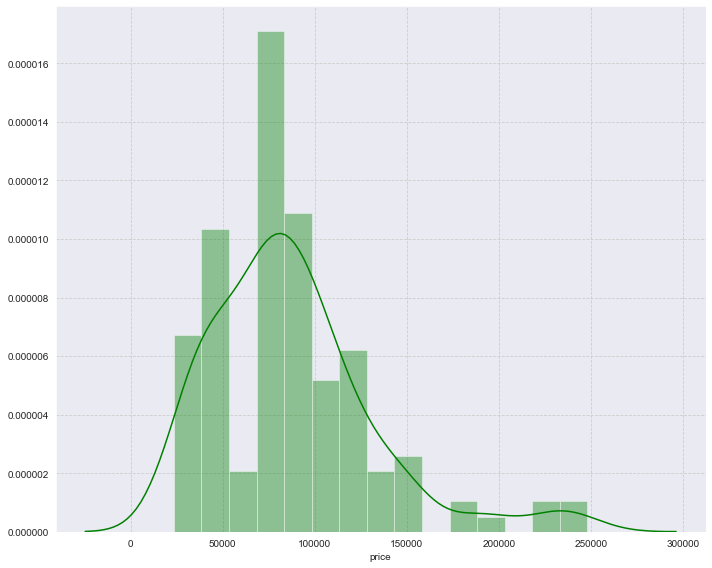

In [13]:
plt.figure(figsize=(10,8))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['price'],bins=15,color='green')
plt.tight_layout()
plt.grid(True)
plt.show()

* Kind of normally distributed and no signs of abnormality in target.

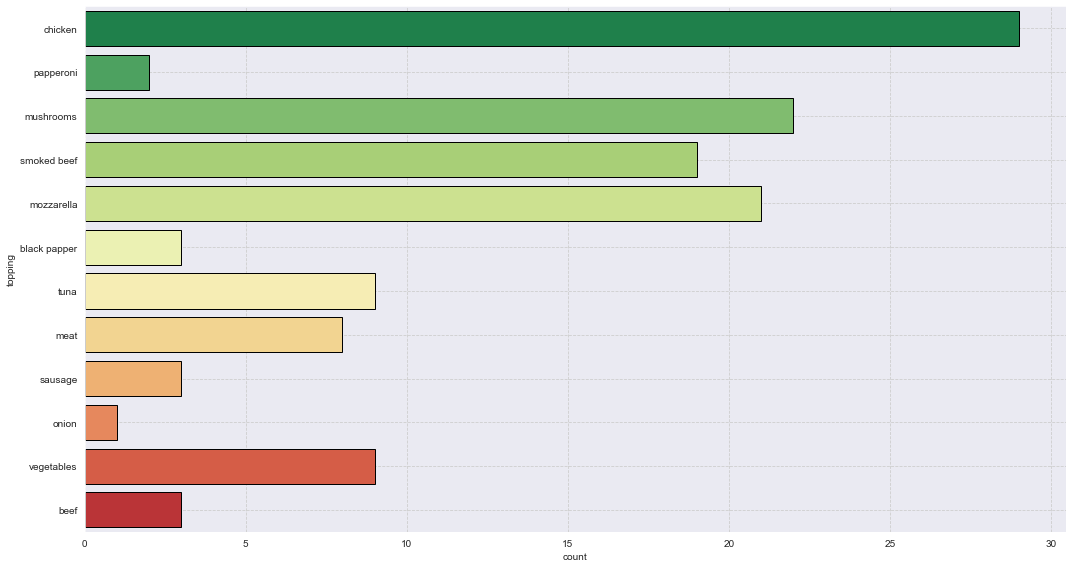

In [14]:
plt.figure(figsize=(15,8))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.countplot(y=df['topping'],palette='RdYlGn_r',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

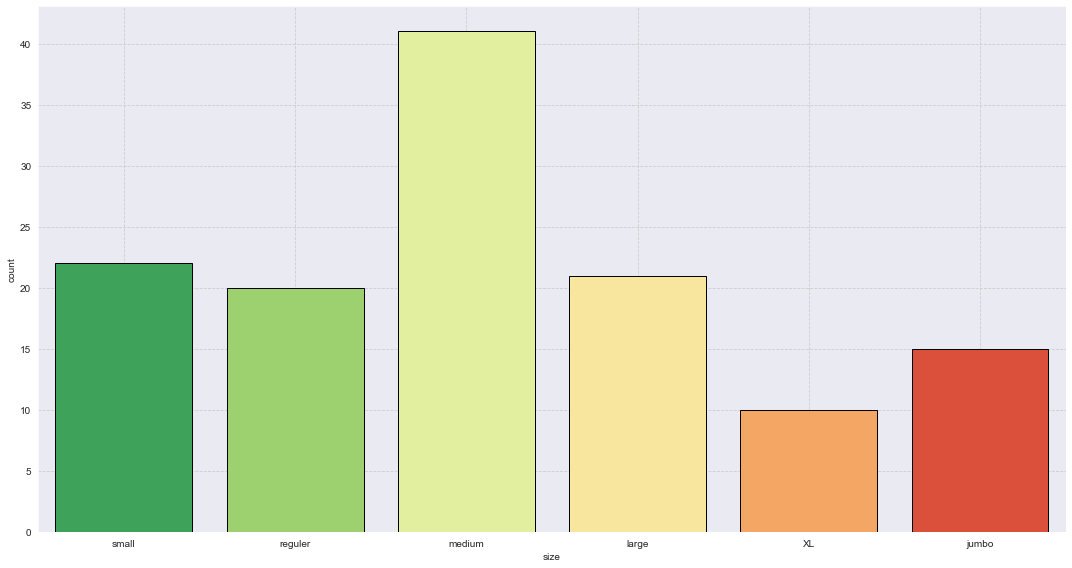

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(df['size'],order=['small','reguler','medium','large','XL','jumbo'],palette='RdYlGn_r',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

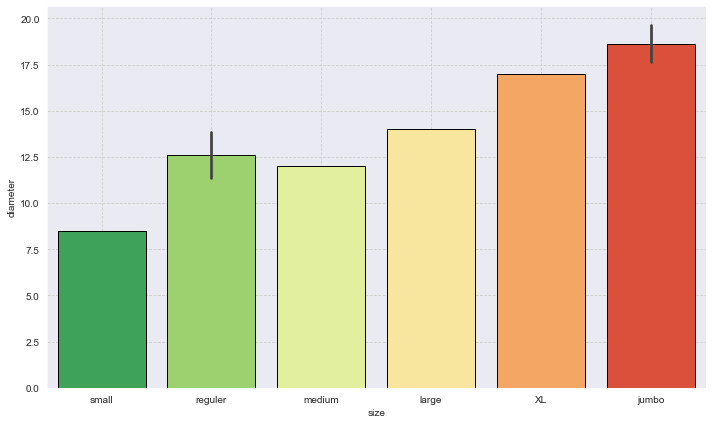

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['size'],y=df['diameter'],order=['small','reguler','medium','large','XL','jumbo'],palette='RdYlGn_r',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

* Since size and diameter column are provinding same information, hence we can drop any one of them.

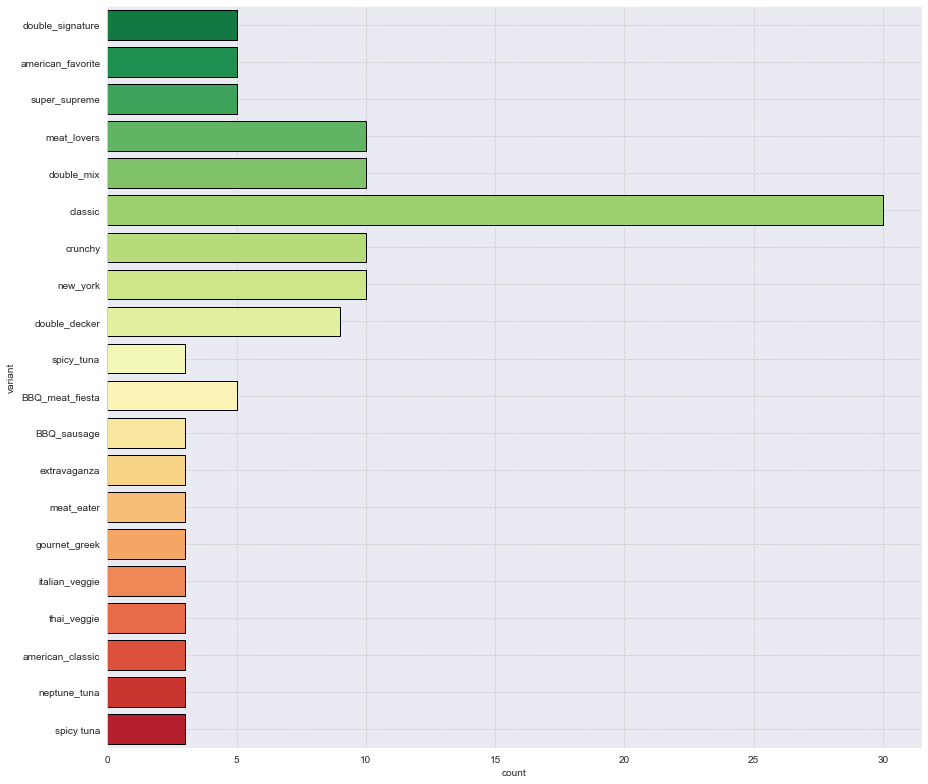

In [17]:
plt.figure(figsize=(13,11))
ax = sns.countplot(y="variant", data=df ,palette='RdYlGn_r', saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

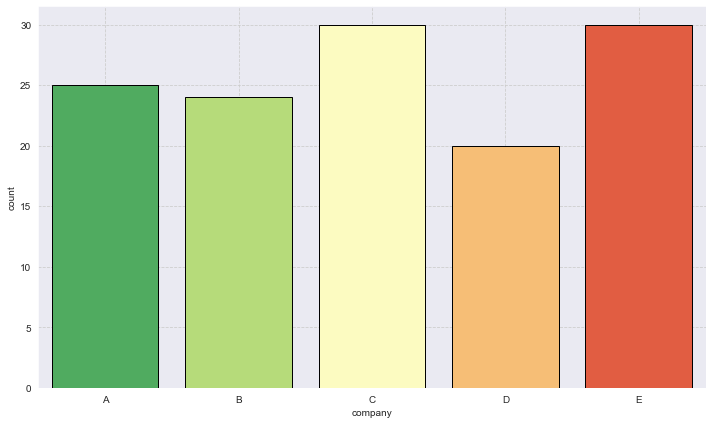

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df['company'],palette='RdYlGn_r',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

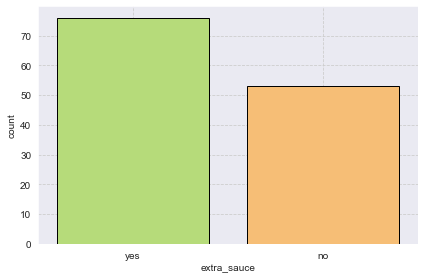

In [19]:
sns.countplot(df['extra_sauce'],order=['yes','no'],palette='RdYlGn_r',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

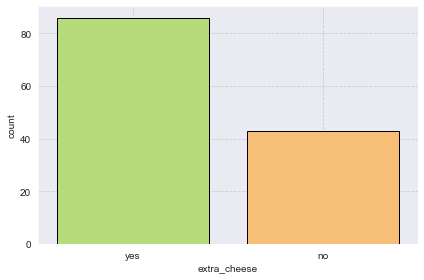

In [20]:
sns.countplot(df['extra_cheese'],order=['yes','no'],palette='RdYlGn_r',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

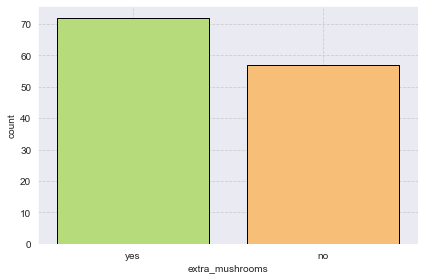

In [21]:
sns.countplot(df['extra_mushrooms'],order=['yes','no'],palette='RdYlGn_r',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

* Let's see the price for different companies

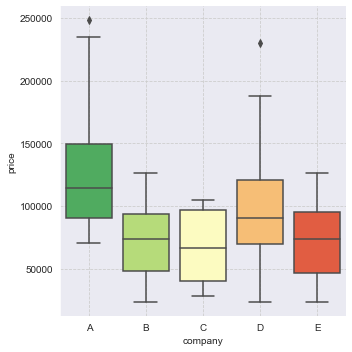

In [22]:
sns.catplot(x='company',y='price',kind='box',data=df,palette='RdYlGn_r',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

* We can see that pizza of company A and D are bit expensive and there are some outliers here

In [23]:
df[df['price']>200000]

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,22.0,chicken,double_signature,jumbo,yes,yes,no,235000
4,A,18.0,mozzarella,double_signature,jumbo,yes,no,yes,248000
20,A,22.0,chicken,double_mix,jumbo,yes,yes,yes,230000
84,D,22.0,chicken,double_mix,jumbo,yes,yes,yes,230000


* Well jumbo pizzas are expensive hence this explains the outliers present in graph

* price of different toppings

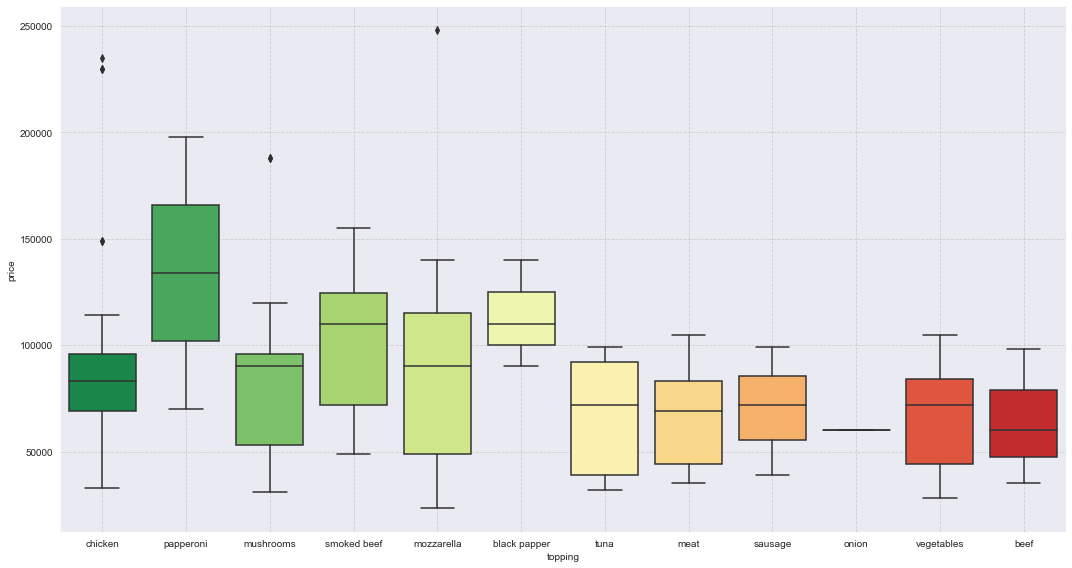

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(df['topping'],df['price'],palette='RdYlGn_r',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

* Checking the outliers

In [25]:
df[(df['topping']=='chicken') & (df['price']>120000)]

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,22.0,chicken,double_signature,jumbo,yes,yes,no,235000
20,A,22.0,chicken,double_mix,jumbo,yes,yes,yes,230000
24,A,16.5,chicken,double_mix,reguler,yes,no,no,149000
84,D,22.0,chicken,double_mix,jumbo,yes,yes,yes,230000
88,D,16.5,chicken,double_mix,reguler,yes,no,yes,149000


In [26]:
df[(df['topping']=='mushrooms') & (df['price']>150000)]

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
21,A,18.5,mushrooms,double_mix,jumbo,yes,yes,yes,188000
85,D,18.5,mushrooms,double_mix,jumbo,yes,yes,yes,188000


In [27]:
df[(df['topping']=='mozzarella') & (df['price']>150000)]

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
4,A,18.0,mozzarella,double_signature,jumbo,yes,no,yes,248000


In [28]:
df[(df['topping']=='onion')]

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
59,C,12.0,onion,extravaganza,medium,yes,yes,no,60000


* There is no abnormality in the data. And from the boxplot we can see that papperoni topping pizza are most expensive and beef pizza are least expensive

* price of different size

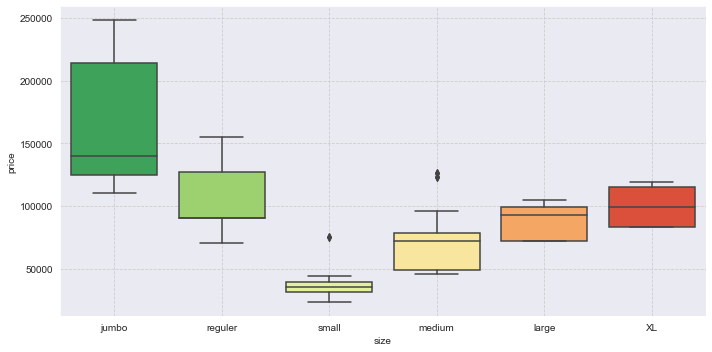

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(df['size'],df['price'],palette='RdYlGn_r',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

# Data preprocessing

In [30]:
df.drop(['diameter'],axis=1,inplace=True)

In [31]:
df.head()

,company,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,chicken,double_signature,jumbo,yes,yes,no,235000
1,A,papperoni,double_signature,jumbo,yes,yes,no,198000
2,A,mushrooms,double_signature,reguler,yes,yes,yes,120000
3,A,smoked beef,double_signature,reguler,yes,no,yes,155000
4,A,mozzarella,double_signature,jumbo,yes,no,yes,248000


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
features=(['company', 'topping', 'variant', 'size', 'extra_sauce',
       'extra_cheese', 'extra_mushrooms'])

In [34]:
for col in features:
    df[col]=le.fit_transform(df[col])

In [35]:
df.head()

,company,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,0,2,8,1,1,1,0,235000
1,0,7,8,1,1,1,0,198000
2,0,5,8,4,1,1,1,120000
3,0,9,8,4,1,0,1,155000
4,0,4,8,1,1,0,1,248000


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X=df[features]
y=df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model fitting

Since all the features are categorical, linear models are not perfect for model fitting

In [38]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

### 1. Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

model_dt= DecisionTreeRegressor()
model_dt.fit(X_train,y_train)
pred_dt=model_dt.predict(X_test)

In [40]:
print('Testing R2 Score: ', r2_score(y_test, pred_dt)*100)

Testing R2 Score:  98.76107158555608


### 2. Random forest regressor

In [41]:
from sklearn.ensemble import  RandomForestRegressor

model_rf= RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
pred_rf= model_rf.predict(X_test)

In [42]:
print('Testing R2 Score: ', r2_score(y_test, pred_rf)*100)

Testing R2 Score:  94.55774521592753


### 3. XGBoost Regressor

In [43]:
from xgboost import XGBRFRegressor

model_xgb = XGBRFRegressor()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

In [44]:
print('Testing R2 Score: ', r2_score(y_test, pred_xgb)*100)

Testing R2 Score:  95.72425606787117
